# Author : Ong Aun Ter 

# Microplastics project #

Plastic benefits society in many ways, ranging from enabling the production of durable goods used in consumers’ daily life to contributing to medical advances (Thompson et al., 2010). However, the durability of this material is both a blessing and a curse. Despite its beneficial properties, it’s persistence in the natural environment has turned it into a pervasive environmental pollutant (Welden, 2019).

There is compelling evidence that microplastics <5mm in diameter are omnipresent in different layers of the Earth. It emerges from various sources such as pharmaceuticals and personal care products (PPCP), exuviate via textile products (clothing, tyre, rayon, etc.) and secondary plastics (Burns & Boxall, 2018; Cole et al., 2013; Hidalgo-ruz et al., 2012; Sundt et al., 2014). This report will present a systematic review on scientific articles that have been published from 2014 to 2019 concerning the occurrence and impacts of microplastics in the environment.

The goal of this project is to understand the occurence and current research areas of microplastics. 

## Journal retrieval ## 

Informational search queries for the word “Microplastics” were inserted into the Scopus database (https://www.scopus.com/home.uri) for the period of 1 January 2015 to 30 November 2019. The search was applied to the “Abstract”, “Title” and “Keywords” of journal articles, returning 1668 articles. Duplicates and articles not published in English were removed and the screening then resulted in 1554 articles.

 ### Import relevant R packages ###

In [ ]:
#First, we have to set our working directory to the folder with all the microplastics journal
setwd("C:/Users/aunte/Desktop/Scopus all in one")
library(tm)
library(topicmodels)
library(readxl)
library(ggplot2)
library(corpus)
library(readr)
library(openxlsx)
library(SnowballC)
library(pdftools)

### Reading the pdf files ### 

In [ ]:
#the dollar sign indicates that, read anything that ends with "pdf"
#the working directory has been set, so there's no need to specify file path anymore 
#read the file and place them into a corpus
files <- list.files(pattern = "pdf$")
corp <- Corpus(URISource(files),
               readerControl = list(reader = readPDF))

#transform everything to lower case for easier analysis 
corp <- tm_map(corp,content_transformer(tolower))


#remove punctuation
corp <- tm_map(corp, removePunctuation, ucp = TRUE)

#From my experience, the above code does not remove some of the punctuation, so we do it here manually (improve data quality)
toSpace <- content_transformer(function(x, pattern) { return (gsub(pattern, " ", x))})
corp <- tm_map(corp, toSpace, "-")
corp <- tm_map(corp, toSpace, ":")
corp <- tm_map(corp, toSpace, "-")
corp <- tm_map(corp, toSpace, "/")
corp <- tm_map(corp, toSpace, "_")
corp <- tm_map(corp, toSpace, "-")
corp <- tm_map(corp, toSpace, "^")
corp <- tm_map(corp, toSpace, "—")
corp <- tm_map(corp, toSpace, "''")
corp <- tm_map(corp, toSpace, "'")
corp <- tm_map(corp, toSpace, "'")
corp <- tm_map(corp, toSpace, '"')
corp <- tm_map(corp, toSpace, "’")
corp <- tm_map(corp, toSpace, "”")
corp <- tm_map(corp, toSpace, '"')
corp <- tm_map(corp, toSpace, "'")
corp <- tm_map(corp, toSpace, "“")
corp <- tm_map(corp, toSpace, "‘")
corp <- tm_map(corp, toSpace, "…")
corp <- tm_map(corp, toSpace, "–")


#Strip digits, in this project we only want texts
corp <- tm_map(corp, removeNumbers)
#remove stopwords, i.e. is, at, was... etc 
corp <- tm_map(corp, removeWords, stopwords("english"))
#remove whitespace
corp <- tm_map(corp, stripWhitespace)
#stem text, convert doing into do, running into run, researching into research etc...
corp <- tm_map(corp,stemDocument,language="english")

#after running the analysis,a lot of unnessary words, so we remove them manually since they dont contribute to our analyses. 

corp <- tm_map(corp, removeWords, c("https", "doiorg", "jmarpolbul", "jenvpol", "jscitotenv", 
                                    "doi", "acsestb", "sci", "total", "marpolbul", "journalpon", 
                                    "research", "jmarenvr", "jwatr", "wwtps", "talviti", "pcbs", 
                                    "hoc", "wang", "yang", "liu", "zhao", 
                                    "zhang”, “may”, “dri”, “per”, “ryan”, “tabl”, “fig”, “acsestb”, 
                                    “valu”, “repes”, “chen”, “mpa”, “sampl”, “srep”, “res”, 
                                    “thompson”, “howev”, “supplementari”, “also”, “may”, “due”, 
                                    “average”, “bull")

In [15]:
print(nrow(dtm))
print(ncol(dtm))
#there are 1554 row (articles), and 23800 different words that has occured at least 5 times or more. 

[1] 1554
[1] 23800


In [17]:
#we only retrieve words that occur more than 5 times
dtm <- DocumentTermMatrix(corp, control = list(bounds = list(global = c(5,Inf))))
#print a summary
head(dtm)
#we can ignore the error, we just want take a look how our data looks like. 

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

X,X.....,X....,X.du,X.garet,X.gico,X.lez,X.lineau,X.lvez,X.mez,...,zürich,zuur,zvieli,zweifel,zwet,zwitterion,zwu,zylstra,zymat,zyme
1-s2.0-S0147651318302057-main.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-3D-numerical-model-to-Track-Marine-Plastic-Debris-TrackMPD-Sensitivity-of-microplastic-trajectories-and-fates-to-particle-dynamical-properties-and-physical-processesMarine-Pollution-Bulletin.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-baseline-assessment-of-beach-macrolitter-and-microplastics-along-northeastern-Atlantic-shoresMarine-Pollution-Bulletin.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-brief-history-of-marine-litter-research.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-Canadian-policy-framework-to-mitigate-plastic-marine-pollutionMarine-Policy.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-case-study-investigating-temporal-factors-that-influence-microplastic-concentration-in-streams-under-different-treatment-regimesEnvironmental-Science-and-Pollution-Research.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Our document term matrix will be binary, if a word occurs in the document, it will be displayed as 1. 

## Topic Modelling ##

In [ ]:
#convert dtm to matrix
m <- as.matrix(dtm)
               
#write as csv file (optional)
write.csv(m,file="dtm.csv")
View(m)

#Set parameters for Gibbs sampling
burnin <- 4000
iter <- 2000
thin <- 500
seed <-list(2003,5,63,100001,765)
nstart <- 5
best <- TRUE

#Number of topics, performed sensitivity analysis, tried 5 topics, then 10, then 15, then 20. 20 topics seems to yield the best result
k <- 20
#Run LDA using Gibbs sampling
ldaOut <-LDA(m,k, method="Gibbs", control=list(nstart=nstart, seed = seed, best=best, burnin = burnin, iter = iter, thin=thin))


In [19]:
#write out results
#docs to topics
ldaOut.topics <- as.matrix(topics(ldaOut))
write.csv(ldaOut.topics,file=paste("LDAGibbs",k,"DocsToTopics.csv"))
DocsToTopics <- read.csv(file = 'LDAGibbs 20 20DocsToTopics.csv')
head(DocsToTopics)

X,V1
1-s2.0-S0147651318302057-main.pdf,2
A-3D-numerical-model-to-Track-Marine-Plastic-Debris-TrackMPD-Sensitivity-of-microplastic-trajectories-and-fates-to-particle-dynamical-properties-and-physical-processesMarine-Pollution-Bulletin.pdf,3
A-baseline-assessment-of-beach-macrolitter-and-microplastics-along-northeastern-Atlantic-shoresMarine-Pollution-Bulletin.pdf,1
A-brief-history-of-marine-litter-research.pdf,8
A-Canadian-policy-framework-to-mitigate-plastic-marine-pollutionMarine-Policy.pdf,10
A-case-study-investigating-temporal-factors-that-influence-microplastic-concentration-in-streams-under-different-treatment-regimesEnvironmental-Science-and-Pollution-Research.pdf,5


From the code above, by using latent dirichlet allocation (LDA) and Gibbs Sampling, we have successfully separated the articles into 20 distinct topics. 

In our dataframe, the "X" represents the title of the journal article while "V1" represents the topic number. 

In [21]:
#top 50 terms in each topic
ldaOut.terms <- as.matrix(terms(ldaOut,50))
write.csv(ldaOut.terms,file=paste("LDAGibbs",k,"TopicsToTerms50.csv"))
TopicToTerms50 <- read.csv(file = 'LDAGibbs 20 20TopicsToTerms50.csv')
TopicToTerms50

X,Topic.1,Topic.2,Topic.3,Topic.4,Topic.5,Topic.6,Topic.7,Topic.8,Topic.9,...,Topic.11,Topic.12,Topic.13,Topic.14,Topic.15,Topic.16,Topic.17,Topic.18,Topic.19,Topic.20
1,beach,sorption,particl,sea,microplast,microplast,microplast,plastic,<U+FB01>ber,...,<U+FB01>sh,microplast,exposur,mps,stress,microplast,particl,degrad,soil,sea
2,sediment,environ,model,sediment,river,mussel,concentr,marin,di<U+FB00>er,...,ingest,pollut,activ,treatment,crack,particl,use,polym,microplast,plastic
3,pollut,concentr,surfac,coral,lake,digest,effect,microplast,e<U+FB00>ect,...,speci,china,mps,wastewat,grain,fiber,microplast,surfac,environ,marin
4,marin,organ,size,water,water,tissu,exposur,pollut,use,...,microplast,environ,cell,water,strain,fish,method,plastic,plastic,microplast
5,pellet,adsorpt,transport,marin,sediment,pollut,test,debri,wash,...,fish,abund,e<U+FB00>ect,remov,materi,filter,polym,environ,microbi,pollut
6,plastic,chemic,use,ocean,environ,environ,particl,environ,microplast,...,studi,water,<U+FB01>sh,environ,deform,water,analysi,water,communiti,litter
7,coast,metal,concentr,ice,freshwat,particl,environ,http,figur,...,food,plastic,microplast,particl,use,fibr,size,use,bacteri,mediterranean
8,site,model,ocean,deep,plastic,ingest,size,ingest,environ,...,pollut,size,signi<U+FB01>c,sludg,load,studi,extract,pet,bio<U+FB01>lm,water
9,coastal,microplast,time,arctic,particl,organ,ingest,mar,releas,...,stomach,surfac,toxic,plant,cycl,signific,raman,increas,bacteria,area
10,debri,pollut,water,microplast,pollut,marin,use,dxdoiorg,textil,...,individu,studi,group,microplast,fatigu,use,ftir,oxid,terrestri,studi


In the above data frame, we can see that the top 50 words associated with the Topic number. From here we can identify the topic name from experts opinion. 
For example, the first topic, we see the words beach, sediment, marin, pellet, coast, coastal, bay, island... etc. We can safely presume topic 1 has something to do with Coastal studies.

Let's look at a column with easily identify words, Topic 14. We see the words, treatment, wastewater, sludge, microbead, sewage, discharge. We can safely presume Topic 14 has something to do with Water Treatment, thus we can name Topic 14 as Water treatment. 

Below are the topics with their respective names, advice from expert opinions.  

In [23]:
TopicNames <- read.csv(file = 'topic_names.csv')
TopicNames

ï..Index,Title
Topic 1,Coastal studies
Topic 2,interactions with the environment
Topic 3,Occurrence in surface water
Topic 4,Zooplankton
Topic 5,Distribution
Topic 6,Bivalves
Topic 7,Marine microbes
Topic 8,Birds
Topic 9,textile
Topic 10,Human Health


In [25]:
#probabilities associated with each topic assignment
topicProbabilities <- as.data.frame(ldaOut@gamma)
theta_matrix <- read.csv(file = 'theta_matrix.csv')
head(theta_matrix)

X,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,X.1
1,0.035271180,0.568769940,0.003367600,0.014356611,0.008684864,0.007975895,0.006203474,0.007975895,0.041651896,...,0.127791563,0.022864233,0.001595179,0.007621411,0.005494505,0.035980149,0.033144275,0.052640907,0.007975895,0.05
2,0.062962963,0.001089325,0.722803195,0.001525054,0.000653595,0.001525054,0.004139434,0.051198257,0.042483660,...,0.012273057,0.000944081,0.000944081,0.001089325,0.000508351,0.001815541,0.006027596,0.009077705,0.061655773,NA
3,0.329044766,0.005816003,0.001938668,0.003348608,0.003701093,0.014275643,0.001586183,0.126718364,0.046351780,...,0.009693338,0.002996123,0.003701093,0.001233698,0.007578428,0.137997885,0.005111033,0.007578428,0.212372224,NA
4,0.032443861,0.001531059,0.025736366,0.071230679,0.002989210,0.000947798,0.006051327,0.502114319,0.001822689,...,0.000510353,0.000801983,0.001385244,0.011154856,0.040755322,0.001239428,0.003572470,0.002114319,0.074438612,NA
5,0.030784943,0.004814707,0.002772104,0.001021301,0.015903122,0.003355705,0.001313102,0.115407062,0.001896703,...,0.011234316,0.001313102,0.000729501,0.004522906,0.002480303,0.002188503,0.002772104,0.001896703,0.013276919,NA
6,0.004998837,0.019414090,0.103348059,0.004766333,0.404673332,0.002673797,0.016159033,0.034526854,0.003603813,...,0.005696350,0.003138805,0.127760986,0.011973960,0.129388514,0.039409440,0.002441293,0.010578935,0.031969309,NA


In [ ]:
#Here we have the article's weight to each topic. From here we can then try and grouped them based on their relevancy. 
#transposed to that dendogram wont show 1554 variables
topicprobabilites25TRANSPOSED <- read_excel("topicprobabilites25TRANSPOSED.xlsx")

#calculate the Euclidean distance between topics 
topic.trans <- dist(topicprobabilites25TRANSPOSED, method = "euclidean")

hclust(topic.trans, method = "ward.D")

topic.hclust <- hclust(topic.trans, method = "ward.D")
plot(topic.hclust)

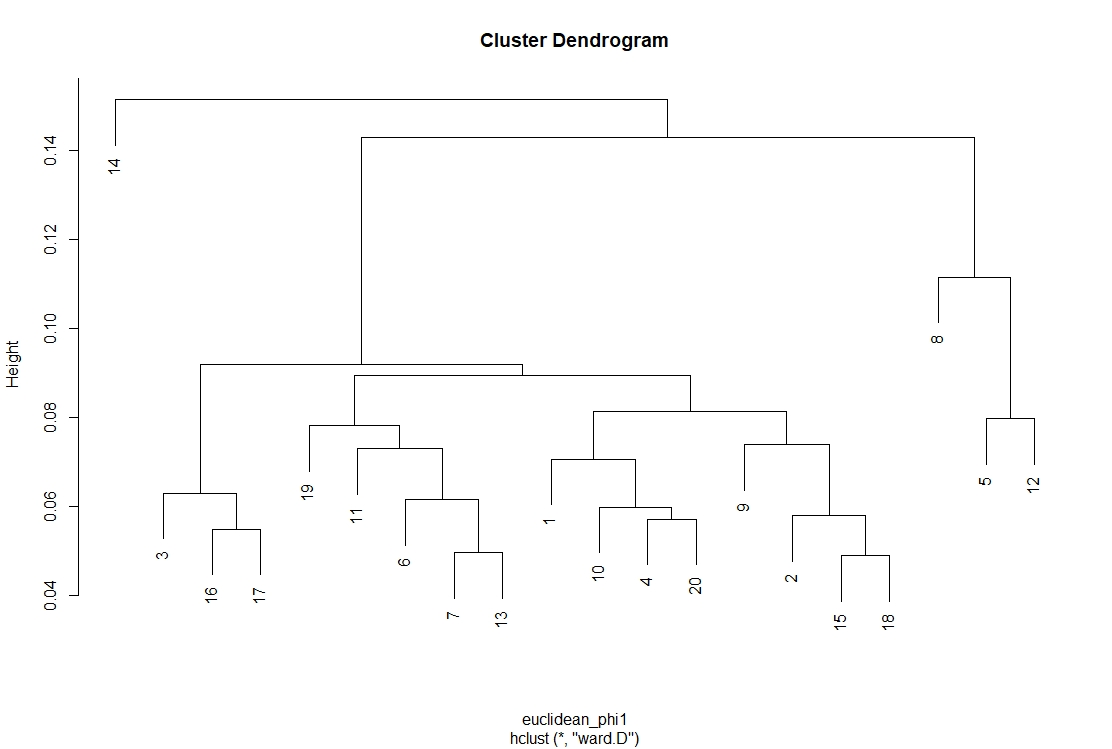

From the figure above, we can see there are 3 major clusters. With the 2nd cluster further split into another 3 clusters. 

Topic 14 (Water Treatment) is the most different according to euclidean distance analysis using ward.D method. 

let's examine the other clusters. 
1. Topic 3, 16, and 17 - Occurence in surface water, Fate and Transport and detection tecniques.
2. Topic 6, 7, 11, 13, and 19 - Bivales, Marine microbes, Fish, zebrafish and microbiota.
3. Topic 1, 4, 10 and 20 - Coastal Studies, zooplankton, Human health and Mediterranean and Artic.
4. Topic 2, 9, 15, 18 - Interactions w/ the environment, Textile, Material science, and types and characteristics. 
5. Topic 5, 8 and 12 - Distribution, Birds, Water Bodies. 

It makes sense that the topics are clustered as such. Lets look at point 1, The occurence of microplastics in surface water has got something to do with the transportation and detection techniques of microplastics. 

Moving on to point 2, the topics clustered together are marine biota.

Point 3 shows that coastal studies, zooplankton, human health and mediterranean and artic has most relevance. The mediterranean sea is surrounded by many major cities, it makes sense that there will be a lot of coastal and human health studies in the region. Zooplankton probably have a lot to do with the artic, since zooplanktons are found everywhere. 

Point 4 shows the journal articles are explosring the microplastics characterisitcs excreted from textile nature (tyre, PPCA, etc) and its chemical reaction with the surrounding environment. 

Point 5 is about distribution, birds and waterbodies, makes sense birds can travel long distances thus have good coverage and is often found near water bodies. This makes them one of the carriers of microplastics. 

## Correlation of the 20 topics ##

The first, “theta” (Θ), has rows representing a distribution of topics over documents. The second, phi (Φ), has rows representing a distribution of words over topics. In the case of probabilistic models, these are categorical probability distributions. To compare the difference in topics based on words versus articles, we calculated the product of the ‘word’ and ‘article’ distance matrices (‘gap’ distance matrix)

To do this, we have to extract the Phi and Theta matrix using the following code. 

In [30]:
phi_matrix <- posterior(ldaOut)$terms # Extract the phi matrix
phi_matrix <- round(phi_matrix, 3) # Round the numbers to 3 decimals
phi_matrix <- read.csv(file = 'phi_matrix.csv')
head(phi_matrix)
#we can ignore the userwarning, since its just an error of displaying to many columns. 

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

X,X.....,X....,X.du,X.garet,X.gico,X.lez,X.lineau,X.lvez,X.mez,...,pest,pesti,pestic,pesticid,pestl,pet,peta,pete,peter,peterlin
topic1,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.08e-05,3.38e-07,3.38e-07,7.10e-06,...,4.77e-05,3.38e-07,3.38e-07,0.000071400,3.38e-07,3.38e-07,3.38e-07,3.38e-07,0.000000338,3.38e-07
topic2,3.18e-07,3.18e-07,3.18e-07,3.18e-07,3.18e-07,3.18e-07,3.18e-07,3.18e-07,3.18e-07,...,3.18e-07,1.30e-05,3.18e-07,0.000811601,3.18e-07,3.18e-07,3.18e-07,3.18e-07,0.000006680,3.18e-07
topic3,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,3.38e-07,...,3.38e-07,3.38e-07,3.38e-07,0.000000338,3.38e-07,3.38e-07,3.38e-07,3.38e-07,0.000000338,1.38e-05
topic4,5.80e-07,5.80e-07,5.80e-07,5.80e-07,5.80e-07,1.22e-05,8.76e-05,5.80e-07,5.80e-07,...,6.38e-06,5.80e-07,5.80e-07,0.000000580,5.80e-07,5.80e-07,5.80e-07,5.80e-07,0.000012200,5.80e-07
topic5,3.26e-07,3.26e-07,2.64e-05,3.26e-07,3.26e-07,3.26e-07,3.26e-07,3.26e-07,3.26e-07,...,3.26e-07,3.26e-07,3.26e-07,0.000026400,3.26e-07,3.26e-07,3.26e-07,3.58e-06,0.000345572,6.84e-06
topic6,3.77e-07,3.77e-07,3.77e-07,4.14e-06,4.14e-06,3.77e-07,3.77e-07,3.77e-07,3.77e-07,...,3.77e-07,3.77e-07,3.77e-07,0.000000377,3.77e-07,4.14e-06,3.77e-07,3.77e-07,0.000000377,3.77e-07


In [31]:
theta_matrix <- posterior(ldaOut)$topics # Extract the theta matrix
theta_matrix <- round(as.data.frame(theta_matrix), digits = 3)
theta_matrix <- read.csv(file = 'theta_matrix.csv')
head(theta_matrix)

X,X1.s2.0.S0147651318302057.main.pdf,A.3D.numerical.model.to.Track.Marine.Plastic.Debris.TrackMPD.Sensitivity.of.microplastic.trajectories.and.fates.to.particle.dynamical.properties.and.physical.processesMarine.Pollution.Bulletin.pdf,A.baseline.assessment.of.beach.macrolitter.and.microplastics.along.northeastern.Atlantic.shoresMarine.Pollution.Bulletin.pdf,A.brief.history.of.marine.litter.research.pdf,A.Canadian.policy.framework.to.mitigate.plastic.marine.pollutionMarine.Policy.pdf,A.case.study.investigating.temporal.factors.that.influence.microplastic.concentration.in.streams.under.different.treatment.regimesEnvironmental.Science.and.Pollution.Research.pdf,A.citizen.engagement.approach.to.water.advocacy.Experiences.from.eXXpedition.Great.LakesMaritime.Affairs..1..pdf,A.citizen.engagement.approach.to.water.advocacy.Experiences.from.eXXpedition.Great.LakesMaritime.Affairs.pdf,A.combined.experimental.and.modeling.study.to.evaluate.pHdependent.sorption.of.polar.and.nonpolar.compounds.to.polyethylene.and.polystyrene.microplasticsEnvironmental.Sciences.Europe.pdf,...,White.and.wonderful.Microplastics.prevail.in.snow.from.the.Alps.to.the.ArcticScience.Advances.pdf,Widespread.detection.of.a.brominated.flame.retardant.hexabromocyclododecane.in.expanded.polystyrene.marine.debris.and.microplastics.from.South.Korea.and.the.AsiaPacific.coastal.regionEnvironmental.Pollution.pdf,Widespread.distribution.of.PET.and.PC.microplastics.in.dust.in.urban.China.and.their.estimated.human.exposureEnvironment.International.pdf,Widespread.microplastic.ingestion.by.fish.assemblages.in.tropical.estuaries.subjected.to.anthropogenic.pressuresMarine.Pollution.Bulletin.pdf,Widespread.microplastics.distribution.at.an.Amazon.macrotidal.sandy.beachMarine.Pollution.Bulletin.pdf,Wind.erosion.as.a.driver.for.transport.of.light.density.microplasticsScience.of.the.Total.Environment.pdf,Worldwide.distribution.and.abundance.of.microplastic.How.dire.is.the.situationWaste.Management.and.Research.pdf,Xray.characterization.of.the.micromechanical.response.ahead.of.a.propagating.small.fatigue.crack.in.a.Nibased.superalloyActa.Materialia.pdf,YusofShuaib_21_5_7.pdf,Zebrafish.can.recognize.microplastics.as.inedible.materials.Quantitative.evidence.of.ingestion.behaviorScience.of.the.Total.Environment.pdf
topic1,0.035271180,0.062962963,0.329044766,0.032443861,0.030784943,0.004998837,0.003453773,0.005579171,0.002244837,...,0.012461403,0.078008199,0.000659457,0.053479381,0.505069370,0.059486448,0.190024308,0.001466890,0.040182106,0.003635734
topic2,0.568769940,0.001089325,0.005816003,0.001531059,0.004814707,0.019414090,0.003453773,0.005047821,0.584705178,...,0.002756948,0.186279238,0.101951992,0.001932990,0.004535752,0.005563481,0.007900150,0.001606594,0.000989707,0.001211911
topic3,0.003367600,0.722803195,0.001938668,0.025736366,0.002772104,0.103348059,0.011424017,0.006110521,0.087548638,...,0.036943097,0.001567398,0.006726457,0.016881443,0.041355390,0.273751783,0.001729619,0.011804973,0.003760887,0.022680055
topic4,0.014356611,0.001525054,0.003348608,0.071230679,0.001021301,0.004766333,0.003985122,0.009829968,0.014815923,...,0.280216145,0.001326260,0.001450805,0.006056701,0.017876201,0.004992867,0.007526178,0.005797709,0.008907363,0.007790859
topic5,0.008684864,0.000653595,0.003701093,0.002989210,0.015903122,0.404673332,0.133634431,0.129383634,0.033373242,...,0.029885311,0.003014227,0.011210762,0.082087629,0.031216649,0.079172611,0.138883695,0.002305113,0.007719715,0.094702216
topic6,0.007975895,0.001525054,0.014275643,0.000947798,0.003355705,0.002673797,0.002922423,0.005579171,0.003442083,...,0.003198059,0.009283820,0.003297283,0.014304124,0.006136606,0.002995720,0.029870980,0.001606594,0.019992082,0.079813019


## Matrix multiplication ##

Now we can perform matrix multiplication to get the 'gap' matrix. To see how correlated are the topics based on the weight of the words.

First we read our phi and theta matrix

In [ ]:
phi <- read.csv(file = "phi_matrix.csv", row.names = 1, header = TRUE, sep = ",")
theta <- read.csv(file = "theta_matrix.csv", row.names = 1, header = TRUE, sep = ",")

In [ ]:
#First, put them into a matrix data frame
datamatrixPHI <- data.matrix(phi)
datamatrixTHETA <- data.matrix(theta)

#Get the values of the matrices interms of euclidean distance
phi_euclidean <- dist(datamatrixPHI, method = "euclidean")

#Round the values for easy multiplication, reduce the computational time
rounded_phi <- round(as.matrix(phi_euclidean)) 

#transform the data to fit between 0 and 1
scaled_phi <- scale(datamatrixPHI)
scaled_theta <- scale(datamatrixTHETA)

#then get their euclidean distance
phi_euclidean <- dist(scaled_phi, method = "euclidean")
theta_euclidean <- dist(scaled_theta, method = "euclidean")
rounded_phi <- round(as.matrix(phi_euclidean))
rounded_theta <- round(as.matrix(theta_euclidean))

#multiply the matrices
phitheta_product <- tcrossprod(rounded_phi, rounded_theta)
scaled_phithetaproduct <- scale(phitheta_product)
gap_distance_matrix <- dist(scaled_phithetaproduct, method = "euclidean")




In [33]:
#To make the data suitable for corrplot, we must reshape the data
melt_phitheta <- melt(gap_distance_matrix)
write.csv(melt_phitheta, "melted_phitheta_gap_matrix.csv")
Heat_map <- read.csv(file = 'melted_phitheta_gap_matrix.csv')
head(Heat_map)

X,Var1,Var2,value
1,Coastal Studies,Coastal Studies,0.0000000
2,Interaction w/ the environment,Coastal Studies,0.6060606
3,Occurrence in the Sea,Coastal Studies,0.2727273
4,Zooplankton,Coastal Studies,0.3030303
5,Distribution from urban areas,Coastal Studies,0.3939394
6,Bivalves,Coastal Studies,0.3939394


In [ ]:
#data looks good, now let's plot the correlation matrix
hmhm <- ggplot(data = melt_phitheta, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + scale_fill_gradient(low = "yellow", 
        high = "red", limits=c(40, 75)) + geom_text(aes(label = round(value, 1)))


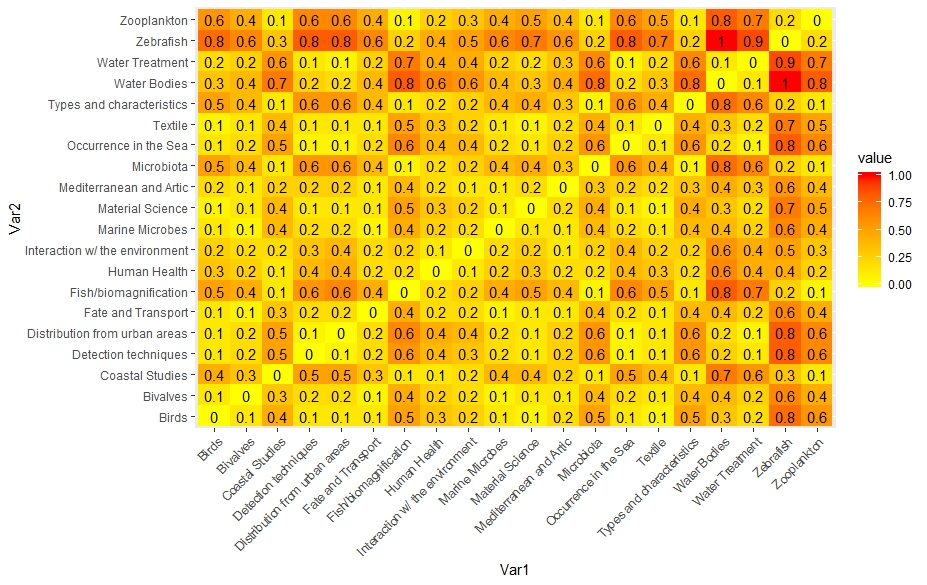

The figure shows the knowledge gaps between identified topics in global microplastics literature. The higher the metirc means the topic contains different words and topic that don't occur in the same article.

Let's look at the topics that have the highest metric, they are:

1. Zebrafish and waterbodies
2. Zebrafish and water treatment
3. Waterbodies and Microbiota

Zebrafish are the model organisms for humans to conduct various experiments. As zebrafish eggs are fertilised and develop outside the mother's body it is an ideal model organism for studying early development. Zebrafish have a similar genetic structure to humans. They share 70 per cent of genes with us. 84 per cent of genes known to be associated with human disease have a zebrafish counterpart. Since most if not all of the journal article on zebra fish are lab based experiments, no surprises that it has no relation to waterbodies at all. Scientist are probably using zebrafish to test for the effects of microplastic in the human system. The same princicple applies for water treatment.

Moving on to the 3rd point, in environmental science, lakes, river, and other fresh water sources are usually referred to as waterbodies. Microbiota includes bacteria, archaea, protists, fungi and viruses. They are the "ecological communities of commensal, symbiotic and pathogenic microorganisms". In the context of waterbodies, researchers are probably studying about the amount of microplastics are present in the waterbodies in urban and rural areas. Whereas for microbiota, researchers are probably studying about the breaking down of microplastics by microbiota. 

Overall, zebrafish and zookplanktons has the highest dissimilarty to the other 18 topics. Researchers should probably focus efforts in connecting the bridge of microplastics research with zebrafish and zookplanktons 

(note to self: this whole paragraph feels like fucking bullshit, should probaly revise) 

## Time Series ##

A lot of the data were manipulated using excel as at the time I was doing this I wasn't great at using the Dplyr package. It wasnt time consuming as it was a lot of copy pasting from multiply dataframe. 

In [39]:
line_graph <- read.csv(file = 'line_graph.csv')
head(line_graph)

ï..Topic,Year,Number
Coastal studies,2015,7
Coastal studies,2016,17
Coastal studies,2017,14
Coastal studies,2018,23
Coastal studies,2019,40
Interaction w/ the environment,2015,4


Since we have 20 topics to display on a line graph, the best way to do this is to use facet wrap with ggplot to plot all 20 line graph in a single figure. 

In [ ]:
#separate the data into individual categories in line graph

L <- ggplot(data = line_graph, aes(x = Year, y = Number, fill = factor(Topic))) + geom_line(position = "dodge", 
    stat = "identity")+ geom_point(show.legend = FALSE) + facet_wrap(~Topic, ncol = 5, scales = "free")

#set all the value of y axis to be the same 
L + ylim(0,60)


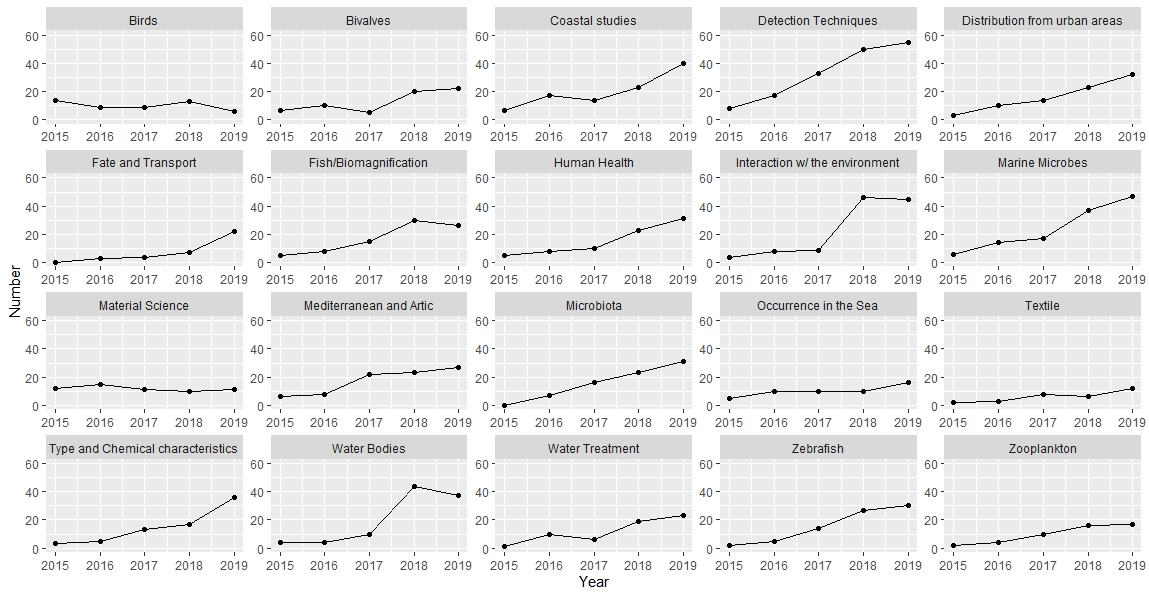

The figure above shows the rate of growth in microplastics literature per subject area. The growth of microplastics journla literature published for each subject area in the micorplastics literature from 2015 to 2019. LDA was used to identify the diffrent topics using full text from 1554 articles. 

The topics “birds” and “material science” have the highest number of publications in 2015 at 14 and 12 respectively (Figure 2.). However, their growth has been stagnant relative to other topics

The steepest growth would be "Detection Techniques", makes sense due to microplastics are very hard to detect and many researches have been working on improving on detection. The faster the detection, the better it is for everyone. 

From the cluster analysis, we have grouped them into 5 topics and visualize them. 

In [40]:
topic_groups <- read.csv(file = '5_groups_topics.csv')
head(topic_groups)

ï..Topic,Year,Number
Material Science,2015,12
Material Science,2016,15
Material Science,2017,11
Material Science,2018,10
Material Science,2019,11
Detection Techniques,2015,8


In [ ]:
ggplot(data= topic_groups, aes(x= Year, y=Number,fill=factor(Topic))) +
+ geom_bar(position="dodge",stat="identity")


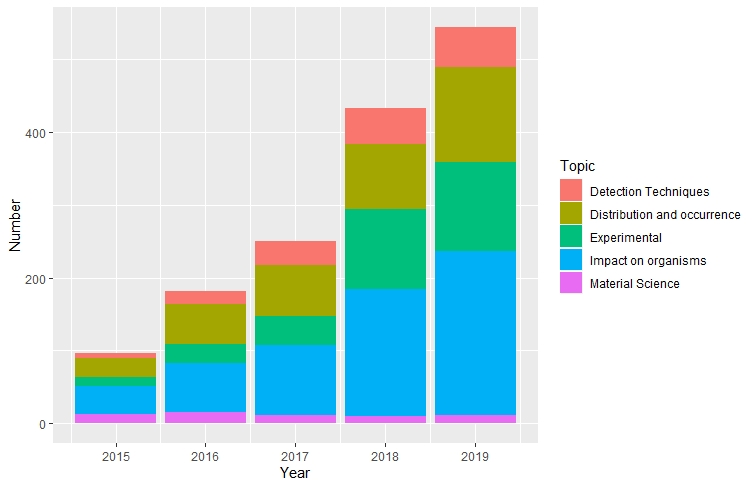

Most frequent terms

In [ ]:
ggplot(data= freq_final, aes(x= reorder(Term, Number),y=Number,fill=factor(Year))) +
+ geom_bar(position="dodge",stat="identity") +
+ coord_flip() + facet_wrap(~Year, ncol = 4, scales = "free")


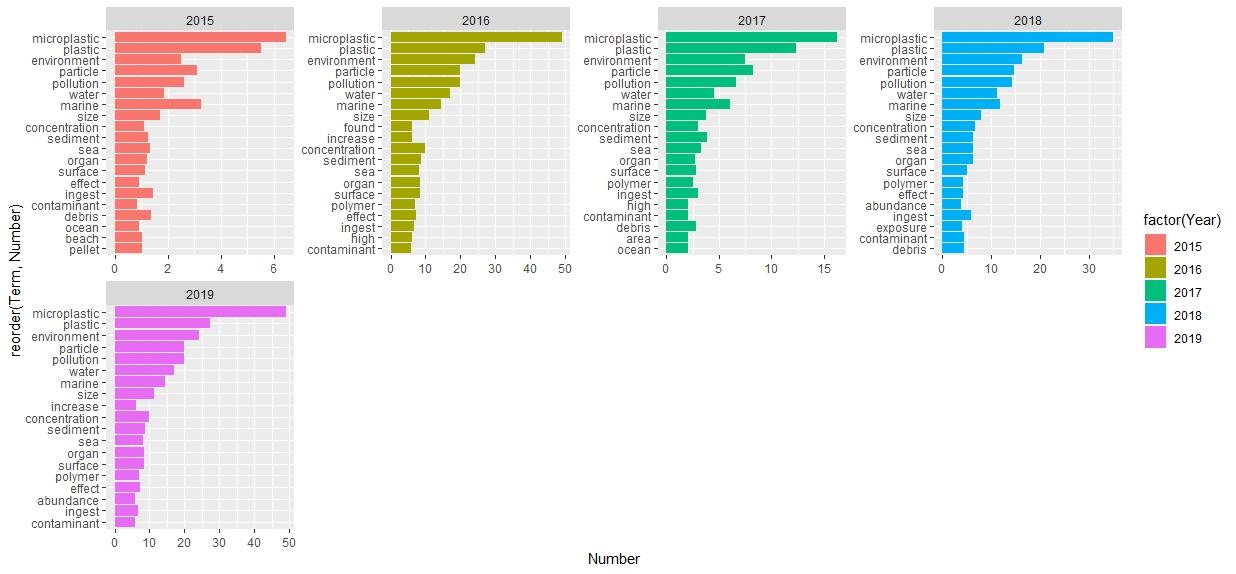

# Conclusion #

The emphasis of this paper is on empirical research in microplastics literature. The topic analyses used available full text articles to avoid the issues of missing the main point of a study and taking words out of context. This method may not be able to identify novel or emerging topics and is only capable of finding out similarities between existing topics. Through topic analysis, past, stagnant, growing and current research focuses were successfully identified in microplastics literature. Regardless of the limitations of topic analysis, the identification of research is an important tool that can allow scientists to increase their efforts towards the fields that have shown to be receiving a lack of attention.

# Future work

Will use Poisson generalized linear mixed model to determine the popular topics and non popular topics in this study's time period  